# Question 1

## Setup

<table style="font-size: 16px; text-align: center;">
  <tr>
    <th>Outlook</th>
    <th>Temperature</th>
    <th>Humidity</th>
    <th>Wind</th>
    <th>Played Football (yes/no)</th>
  </tr>

  <tr>
    <td>Rain</td>
    <td>Mild</td>
    <td>High</td>
    <td>Weak</td>
    <td>Yes</td>
  </tr>

  <tr>
    <td>Rain</td>
    <td>Cool</td>
    <td>Normal</td>
    <td>Weak</td>
    <td>Yes</td>
  </tr>

  <tr>
    <td>Rain</td>
    <td>Cool</td>
    <td>Normal</td>
    <td>Strong</td>
    <td>No</td>
  </tr>

  <tr>
    <td>Rain</td>
    <td>Mild</td>
    <td>Normal</td>
    <td>Weak</td>
    <td>Yes</td>
  </tr>

  <tr>
    <td>Rain</td>
    <td>Mild</td>
    <td>High</td>
    <td>Strong</td>
    <td>No</td>
  </tr>
</table>

## Question 1 part (a)

<div style="font-size: 16px;">
$E(\text{Rain}) = \displaystyle -\frac{3}{5}log_{2}\left( \frac{3}{5} \right) - \frac{2}{5}log_{2} \left( \frac{2}{5} \right)$<br>
$E(\text{Rain}) = 0.971$<br>
</div>

## Question 1 part (b)

<div style="font-size: 16px;">
$E\left(\text{Rain, Humidity}\right) = \displaystyle \frac{2}{5}E(1, 1) + \frac{3}{5}E(2, 1)$<br>
$E\left(\text{Rain, Humidity}\right) = \displaystyle \frac{2}{5}\left(2 \cdot -\frac{1}{2}log_{2}\left(\frac{1}{2}\right)\right) + \frac{3}{5}\left(-\frac{2}{3}log_{2}\left(\frac{2}{3}\right) - \frac{1}{3}log_{2}\left(\frac{1}{3}\right)\right)$<br>
$E\left(\text{Rain, Humidity}\right) = 0.951$<br>
<br>
$E\left(\text{Rain, Temperature}\right) = \displaystyle \frac{2}{5}E(1, 1) + \frac{3}{5}E(2, 1)$<br>
$E\left(\text{Rain, Temperature}\right) = \displaystyle \frac{2}{5}\left(2 \cdot -\frac{1}{2}log_{2}\left(\frac{1}{2}\right)\right) + \frac{3}{5}\left(-\frac{2}{3}log_{2}\left(\frac{2}{3}\right) - \frac{1}{3}log_{2}\left(\frac{1}{3}\right)\right)$<br>
$E\left(\text{Rain, Temperature}\right) = 0.951$<br>
<br>
$E\left(\text{Rain, Wind}\right) = \displaystyle \frac{2}{5}E(0, 2) + \frac{3}{5}E(3, 0)$<br>
$E\left(\text{Rain, Wind}\right) = \displaystyle 0 + 0$<br>
$E\left(\text{Rain, Wind}\right) = 0$<br>
</div>

## Question 1 part (c)

<div style="font-size: 16px;">
$IG\left(\text{Rain, Humidity}\right) = E\left(\text{Rain}\right) - E\left(\text{Rain, Humidity}\right)$<br>
$IG\left(\text{Rain, Humidity}\right) = 0.971 - 0.951$<br>
$IG\left(\text{Rain, Humidity}\right) = 0.020$<br>
<br>
$IG\left(\text{Rain, Temperature}\right) = E\left(\text{Rain}\right) - E\left(\text{Rain, Temperature}\right)$<br>
$IG\left(\text{Rain, Temperature}\right) = 0.971 - 0.951$<br>
$IG\left(\text{Rain, Temperature}\right) = 0.020$<br>
<br>
$IG\left(\text{Rain, Wind}\right) = E\left(\text{Rain}\right) - E\left(\text{Rain, Wind}\right)$<br>
$IG\left(\text{Rain, Wind}\right) = 0.971 - 0$<br>
$IG\left(\text{Rain, Wind}\right) = 0.971$<br>
</div>

In [1]:
# Question 2

# Setup
import os
os.environ["PATH"] += os.pathsep + "D:/Graphviz/bin/"

%matplotlib inline
from matplotlib import pyplot as plt
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np

filename = 'winequality-red.csv'
data = np.genfromtxt(filename, delimiter=',', dtype=str)
X, y = data[1:, :-1], data[1:, -1]
X = X.astype(float)
y = y.astype(float)

print(f'{X.shape = }')
print(f'{y.shape = }')

X.shape = (1599, 11)
y.shape = (1599,)


In [2]:
# Question 2 continued

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(f'{X_train.shape = }')
print(f'{y_train.shape = }')
print(f'{X_test.shape = }')
print(f'{y_test.shape = }')

X_train.shape = (1279, 11)
y_train.shape = (1279,)
X_test.shape = (320, 11)
y_test.shape = (320,)


In [3]:
# Question 2 continued

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(f'{y_pred.shape = }')

y_pred.shape = (320,)


In [6]:
# Question 2 continued

cm = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix = \n{cm}')
print(f'Apprarently, Labels at index 2 and 3 are most likely to be confused!')

Confusion Matrix = 
[[ 0  0  2  0  0  0]
 [ 0  0  7  4  0  0]
 [ 0  8 89 34  5  0]
 [ 0  5 33 75 12  3]
 [ 0  0  7 11 21  1]
 [ 0  0  0  1  2  0]]
Apprarently, Labels at index 2 and 3 are most likely to be confused!


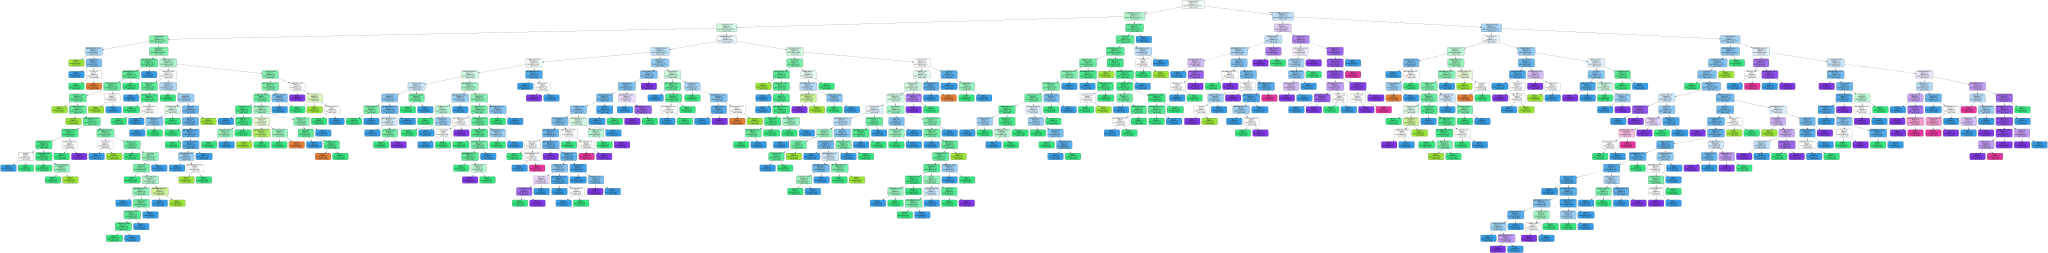

In [5]:
# Question 2 continued

dot_data = export_graphviz(
    model, 
    out_file=None,
    feature_names=data[0, :-1],
    class_names=data[:, -1].astype(str),
    filled=True,
    rounded=True,  
    special_characters=True
)
graph = graphviz.Source(dot_data) 
# Graph's too wide!!
graph